# Introduction to the Article Code:

This is the code used for the article posted on Medium.com. If you would like to know more about it click the link: [CRISP-DM Regression Analysis in Python](https://medium.com/p/ade4b74bdc85/edit)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Extracting the calendar dataset
df_calendar = pd.read_csv('data\seattle\calendar.csv')

# Extracting the listings dataset
target_col = ['accommodates', 'bedrooms', 'cleaning_fee']
df_listings = pd.read_csv('data\seattle\listings.csv')[target_col]

# Calculating null values
null_calendar = df_calendar.isnull().sum()
null_listings = df_listings.isnull().sum()

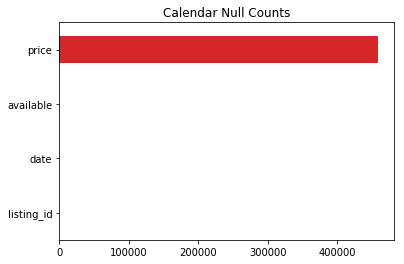

In [47]:
null_calendar.plot.barh(title='Calendar Null Counts');

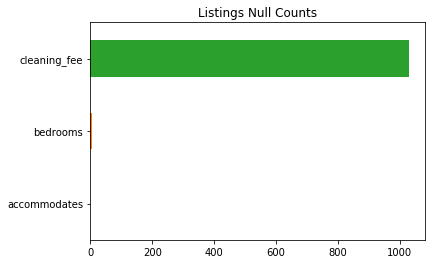

In [48]:
null_listings.plot.barh(title='Listings Null Counts');

In [49]:
df_calendar.loc[:, 'price'] = df_calendar.price.str.findall('[^$,]').str.join('').astype(float)

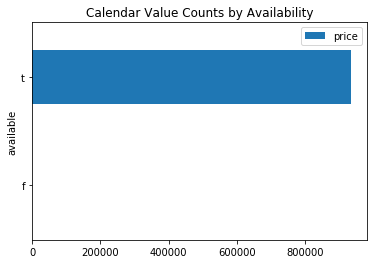

In [50]:
# Grouping prices by the available feature
df_calendar.groupby('available').count()[['price']].plot.barh(title="Calendar Value Counts by Availability");

In [51]:
# Dropping where available is f
df_calendar = df_calendar.where(lambda x: x.available=='t').dropna()
# Kepp only usefull features for the analysis
df_calendar = df_calendar[['listing_id', 'price', 'date']]

In [54]:
df_calendar.head()

,listing_id,price,date
0,241032.0,85.0,2016-01-04
1,241032.0,85.0,2016-01-05
9,241032.0,85.0,2016-01-13
10,241032.0,85.0,2016-01-14
14,241032.0,85.0,2016-01-18


In [55]:
# Converting date to date time
df_calendar.loc[:, 'date'] = df_calendar.date.apply(pd.to_datetime)

# Adding the months
month_format = lambda x: f"{x.month:00d}" + '-' + x.month_name()
month_func = lambda x: x.date.apply(month_format)
df_calendar = df_calendar.assign(month=month_func)

In [58]:
import seaborn as sns

In [77]:
upper_quartile = df_calendar.price.quantile(.75)
lower_quartile = df_calendar.price.quantile(.25)
interquartile =  upper_quartile - lower_quartile

lower_whisker = lower_quartile - interquartile * 1.5
upper_whisker = upper_quartile + interquartile * 1.5

df_calendar_clean = df_calendar.query(f"price<={upper_whisker} and price>={lower_whisker}")

In [79]:
lower_whisker

-52.5

In [80]:
upper_whisker

287.5

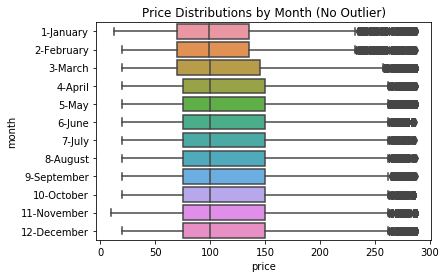

In [83]:
plt.title('Price Distributions by Month (No Outlier)')
sns.boxplot(x='price', y='month', data=df_calendar_clean);